In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
from csv import writer
import math
import cmath
import pickle

import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

2022-04-20 09:56:34.602062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-20 09:56:34.602094: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16],low_memory=False)
    out= pd.read_csv('../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19],low_memory=False)
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


In [4]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj1=MinMaxScaler()
scaler_obj2=MinMaxScaler()
X1=scaler_obj1.fit_transform(A1)
Y1=scaler_obj2.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

In [5]:
from Hybrid_Model import HybridModel
# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)

hybrid_model=HybridModel()

Utkarsh


In [6]:
hybrid_model.load_models()

Loading XGboost Model.........
[09:56:51] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:56:51] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:56:51] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:56:51] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:56:51] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:56:51] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:56:51] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:56:51] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1


/home/utkarsh/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[09:56:51] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:56:51] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:56:51] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:56:51] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[09:56:51] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:56:51] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
Completed............100%
Loading Randomforest Model.........
Completed............100%
Loading Randomforest Model.........
Completed............100%
Loading Linear Regression Model.........
Completed............100%
Loading Lasso Regression Model.........
Completed............100%
Loading Cnn Model.........
Loaded model from disk
C

2022-04-20 09:56:52.519722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-20 09:56:52.519942: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-20 09:56:52.519962: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IT002351): /proc/driver/nvidia/version does not exist
2022-04-20 09:56:52.520555: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded model from disk
Completed............100%
Loading GRU Model.........
Loaded model from disk
Completed............100%


In [7]:

hybrid_model.fit_machine_learning_model(x_test,y_test)

In [8]:
new_x_test=x_test[:,np.newaxis,:]
new_y_test=y_test[:,np.newaxis,:]

In [9]:
hybrid_model.fit_neural_network_model(new_x_test,new_y_test)

In [10]:
res=hybrid_model.predict()
res

array([[ 7.73777574e-05,  6.55451640e-02,  7.66543744e-05, ...,
         3.18311481e-03,  1.99796725e-03,  6.98419870e-04],
       [ 9.06096830e-05,  6.55484945e-02,  9.38494268e-05, ...,
         1.08909355e-02,  5.96268335e-03,  2.47390312e-03],
       [ 1.16577270e-04,  6.55481145e-02,  1.21226265e-04, ...,
         1.40616624e-02,  9.32753459e-03,  3.40562267e-03],
       ...,
       [ 1.48319392e-04,  6.55480325e-02,  1.54969661e-04, ...,
         4.97619770e-02,  3.15338001e-02,  1.10767642e-02],
       [ 7.40945397e-05,  6.55452088e-02,  7.33423512e-05, ...,
         1.04445149e-03, -1.08335761e-03,  3.72242706e-04],
       [ 1.15005394e-04,  6.55483752e-02,  1.19642267e-04, ...,
         4.19285707e-03,  3.18478164e-03,  1.75163138e-03]])

In [12]:
df2=pd.DataFrame(y_test)
df2.head(5)

,0,1,2,3,4,5,6
0,0.000116,0.065537,0.000111,0.000176,0.002145,0.001414,0.000521
1,0.000111,0.065537,0.000121,0.000157,0.010906,0.006399,0.002343
2,0.000114,0.065537,0.000118,0.000108,0.029384,0.018554,0.007614
3,0.000116,0.065537,0.000119,0.000249,0.042263,0.026402,0.009275
4,0.000110,0.065537,0.000122,0.000103,0.007400,0.004821,0.001684


In [13]:
df=pd.DataFrame(res)
df.head(5)

,0,1,2,3,4,5,6
0,0.000077,0.065545,0.000077,0.000135,0.003183,0.001998,0.000698
1,0.000091,0.065548,0.000094,0.000119,0.010891,0.005963,0.002474
2,0.000117,0.065548,0.000121,0.000152,0.014062,0.009328,0.003406
3,0.000132,0.065548,0.000138,0.000168,0.032104,0.020560,0.006464
4,0.000100,0.065548,0.000104,0.000133,0.007123,0.004779,0.002066


In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score_value=r2_score(y_test,res,multioutput='variance_weighted')
mae_value=mean_absolute_error(y_test,res)
mse_value=mean_squared_error(y_test,res)
rmse_value=np.sqrt(mse_value)
print("R2 scotre:",r2_score_value)
print("Mean absolute error:",mae_value)
print("Mean Squared Error:",mse_value)
print("Root Mean Squared Error:",rmse_value)

0.9311709937211867

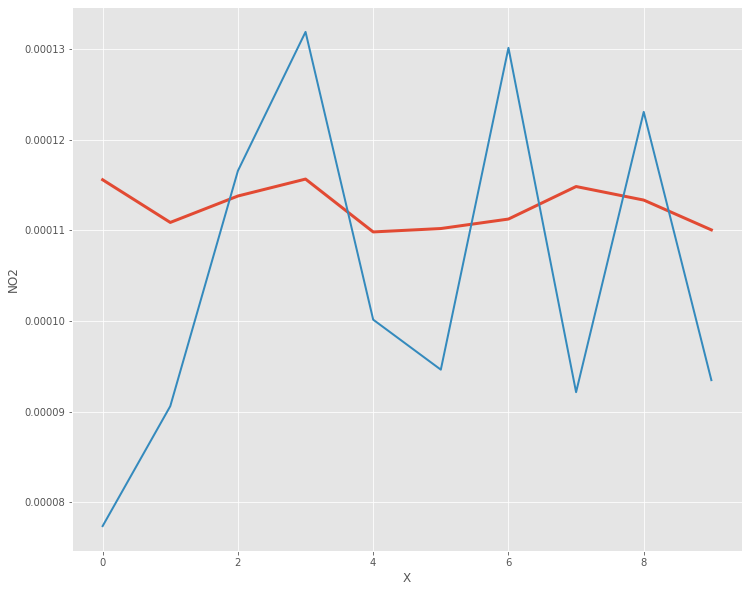

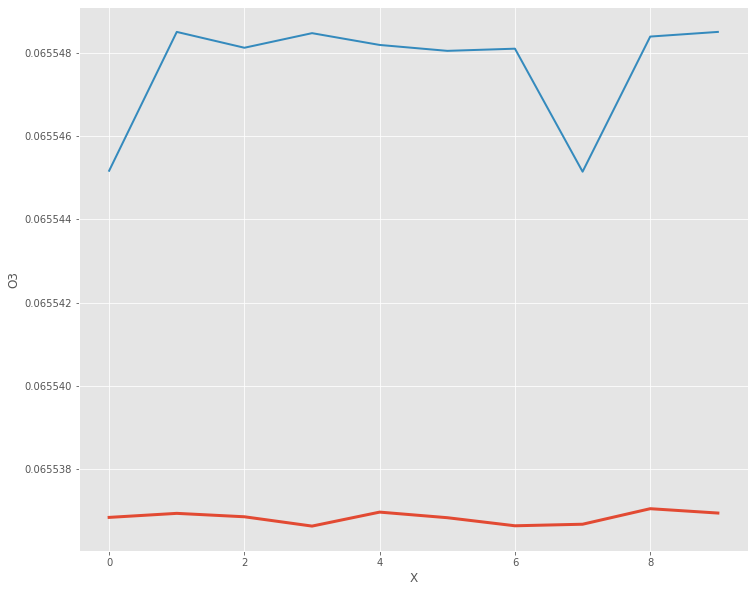

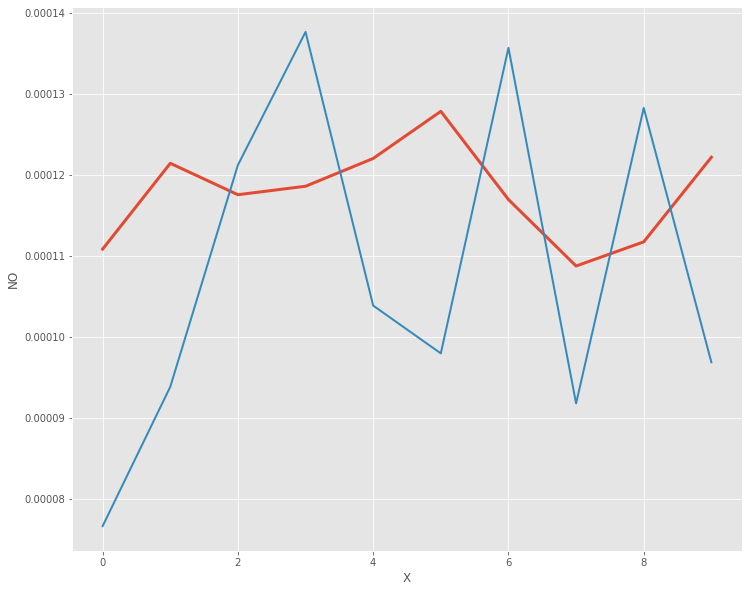

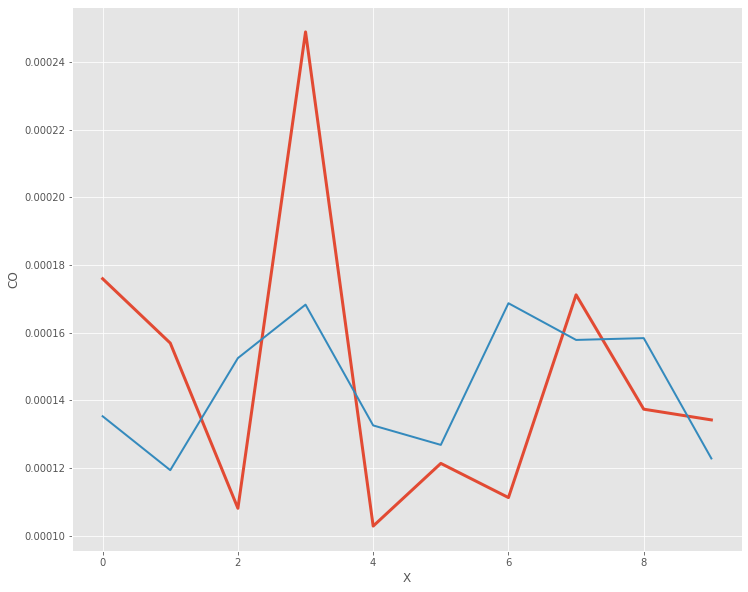

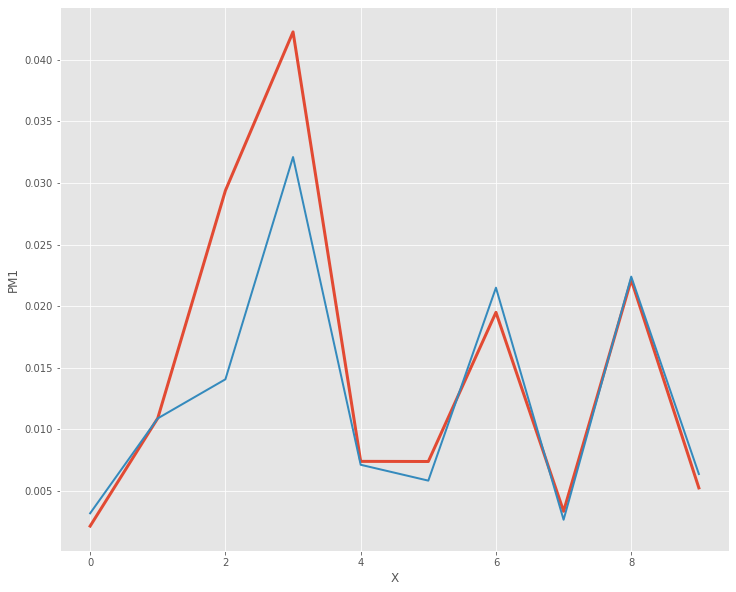

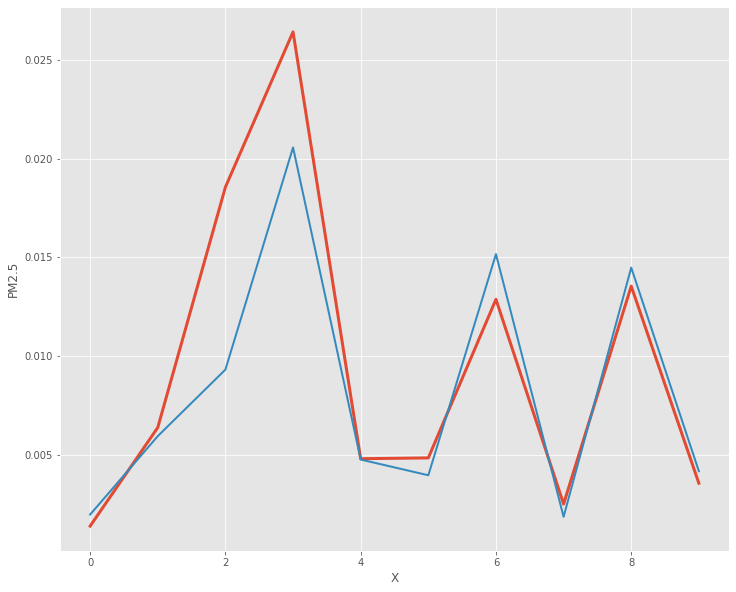

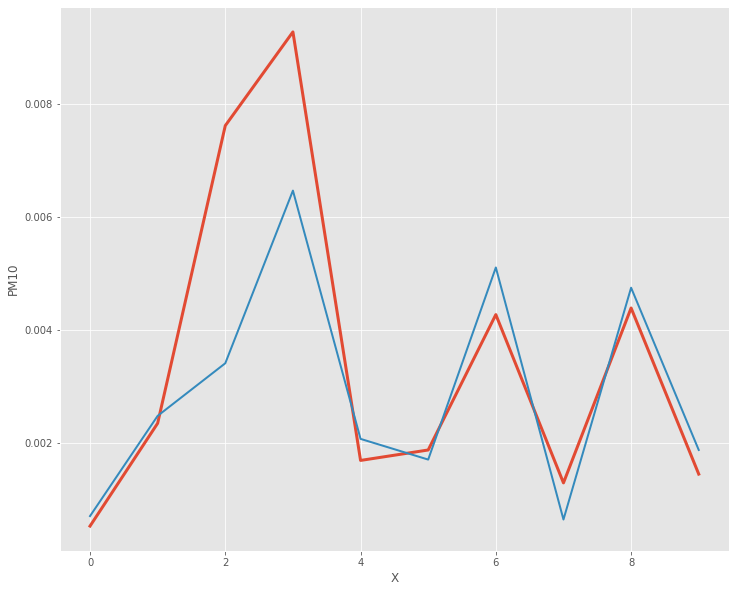

In [15]:
from matplotlib import style
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']
style.use('ggplot')
for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:10,i],linewidth=3, markersize=12)
  plt.plot(res[:10,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()
